# notebooks/03_Model_Experimentation_and_Evaluation.ipynb

In [1]:

import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score


# Add parent directory to path to import modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from scripts.handle_class_imbalance import ImbalanceHandler
from models.model_training import ModelTrainer
from models.model_evaluation import ModelEvaluator
from models.model_explainability import ModelExplainer # For post-training analysis

# --- Initialize Utilities ---
imbalance_handler = ImbalanceHandler()
trainer = ModelTrainer()
evaluator = ModelEvaluator()
explainer = ModelExplainer()

# Define paths for processed dataf
processed_data_output_dir = 'data/processed/'
models_dir = 'models/'

d:\EsH\KAIM\week89\fraud-detection-ml\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# --- 1. Load Processed Data ---
print("Loading processed E-commerce Fraud Data...")
try:
    X_fraud_train_resampled = pd.read_csv(os.path.join(processed_data_output_dir, 'X_fraud_train_resampled.csv'))
    y_fraud_train_resampled = pd.read_csv(os.path.join(processed_data_output_dir, 'y_fraud_train_resampled.csv')).iloc[:, 0]
    X_fraud_test_scaled = pd.read_csv(os.path.join(processed_data_output_dir, 'X_fraud_test_scaled.csv'))
    y_fraud_test = pd.read_csv(os.path.join(processed_data_output_dir, 'y_fraud_test.csv')).iloc[:, 0]
    print("E-commerce data loaded.")
except FileNotFoundError as e:
    print(f"Error loading E-commerce processed data: {e}. Please run `scripts/handle_class_imbalance.py` first.")
    # Fallback for demonstration if data files are missing
    from sklearn.datasets import make_classification
    X_f_train_res, y_f_train_res = make_classification(n_samples=2000, n_features=25, n_informative=10, n_redundant=0, n_repeated=0, n_classes=2, weights=[0.5, 0.5], random_state=42)
    X_fraud_train_resampled = pd.DataFrame(X_f_train_res, columns=[f'feat_{i}' for i in range(25)])
    y_fraud_train_resampled = pd.Series(y_f_train_res)
    X_f_test_scaled, y_f_test = make_classification(n_samples=500, n_features=25, n_informative=10, n_redundant=0, n_repeated=0, n_classes=2, weights=[0.9, 0.1], random_state=42)
    X_fraud_test_scaled = pd.DataFrame(X_f_test_scaled, columns=[f'feat_{i}' for i in range(25)])
    y_fraud_test = pd.Series(y_f_test)
    print("Generated dummy E-commerce data for demonstration.")


print("\nLoading processed Bank Transaction Fraud Data...")
try:
    X_creditcard_train_resampled = pd.read_csv(os.path.join(processed_data_output_dir, 'X_creditcard_train_resampled.csv'))
    y_creditcard_train_resampled = pd.read_csv(os.path.join(processed_data_output_dir, 'y_creditcard_train_resampled.csv')).iloc[:, 0]
    X_creditcard_test_scaled = pd.read_csv(os.path.join(processed_data_output_dir, 'X_creditcard_test_scaled.csv'))
    y_creditcard_test = pd.read_csv(os.path.join(processed_data_output_dir, 'y_creditcard_test.csv')).iloc[:, 0]
    print("Bank transaction data loaded.")
except FileNotFoundError as e:
    print(f"Error loading Bank Transaction processed data: {e}. Please run `scripts/handle_class_imbalance.py` first.")
    # Fallback for demonstration if data files are missing
    from sklearn.datasets import make_classification
    X_cc_train_res, y_cc_train_res = make_classification(n_samples=10000, n_features=30, n_informative=15, n_redundant=0, n_repeated=0, n_classes=2, weights=[0.5, 0.5], random_state=42)
    X_creditcard_train_resampled = pd.DataFrame(X_cc_train_res, columns=[f'V{i}' for i in range(30)])
    y_creditcard_train_resampled = pd.Series(y_cc_train_res)
    X_cc_test_scaled, y_cc_test = make_classification(n_samples=2000, n_features=30, n_informative=15, n_redundant=0, n_repeated=0, n_classes=2, weights=[0.99, 0.01], random_state=42)
    X_creditcard_test_scaled = pd.DataFrame(X_cc_test_scaled, columns=[f'V{i}' for i in range(30)])
    y_creditcard_test = pd.Series(y_cc_test)
    print("Generated dummy Bank Transaction data for demonstration.")


all_evaluation_results = {}

Loading processed E-commerce Fraud Data...
Error loading E-commerce processed data: [Errno 2] No such file or directory: 'data/processed/X_fraud_train_resampled.csv'. Please run `scripts/handle_class_imbalance.py` first.
Generated dummy E-commerce data for demonstration.

Loading processed Bank Transaction Fraud Data...
Error loading Bank Transaction processed data: [Errno 2] No such file or directory: 'data/processed/X_creditcard_train_resampled.csv'. Please run `scripts/handle_class_imbalance.py` first.
Generated dummy Bank Transaction data for demonstration.



==== E-commerce Fraud Model Experimentation ====

--- Training Logistic Regression for E-commerce ---

Training Logistic Regression model...
Logistic Regression training complete.

--- Evaluating E-commerce Logistic Regression ---
F1-Score: 0.1703
AUC-PR (Average Precision): 0.0916

Confusion Matrix:
[[210 237]
 [ 26  27]]


<Figure size 600x500 with 0 Axes>

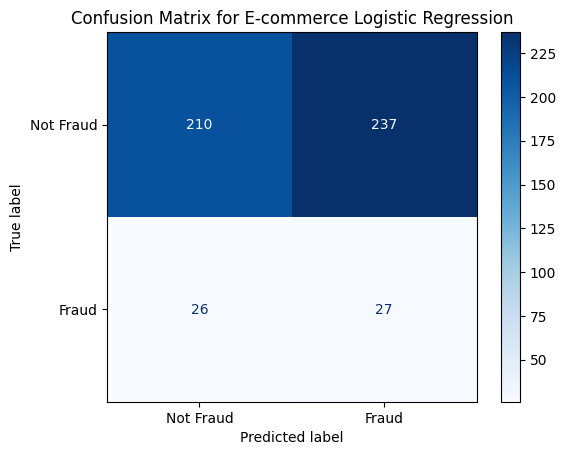

ROC AUC Score: 0.4210
Precision: 0.1023
Recall (Sensitivity): 0.5094
Specificity (True Negative Rate): 0.4698
False Positive Rate (FPR): 0.5302
False Negative Rate (FNR): 0.4906

--- Training LightGBM for E-commerce (with Hyperparameter Tuning) ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits


d:\EsH\KAIM\week89\fraud-detection-ml\env\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 996, number of negative: 1004
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498000 -> initscore=-0.008000
[LightGBM] [Info] Start training from score -0.008000
Best LightGBM parameters for E-commerce: {'feature_fraction': 0.8, 'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 20}

--- Evaluating E-commerce LightGBM (Tuned) ---
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignore

<Figure size 600x500 with 0 Axes>

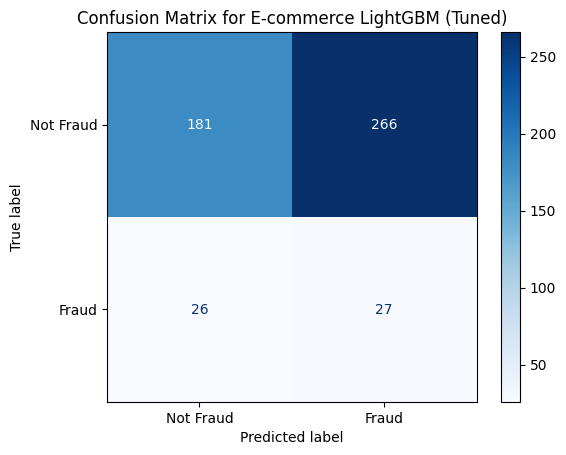

ROC AUC Score: 0.4365
Precision: 0.0922
Recall (Sensitivity): 0.5094
Specificity (True Negative Rate): 0.4049
False Positive Rate (FPR): 0.5951
False Negative Rate (FNR): 0.4906


In [4]:
# --- 2. E-commerce Fraud Model Experimentation ---
print("\n==== E-commerce Fraud Model Experimentation ====")

# Experiment 2.1: Logistic Regression
print("\n--- Training Logistic Regression for E-commerce ---")
lr_fraud_model = trainer.train_logistic_regression(X_fraud_train_resampled, y_fraud_train_resampled)
metrics_lr_fraud = evaluator.evaluate_model(lr_fraud_model, X_fraud_test_scaled, y_fraud_test, "E-commerce Logistic Regression")
all_evaluation_results['E-commerce_LR'] = metrics_lr_fraud

# Experiment 2.2: LightGBM (with Hyperparameter Tuning Example)
print("\n--- Training LightGBM for E-commerce (with Hyperparameter Tuning) ---")
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier(random_state=42, objective='binary')
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [20, 31],
    'feature_fraction': [0.8, 1.0]
}
# Use average_precision_score as the scoring metric for imbalanced data
scorer = make_scorer(average_precision_score, needs_proba=True)

grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid_lgbm,
                                cv=3, scoring=scorer, verbose=1, n_jobs=-1)
grid_search_lgbm.fit(X_fraud_train_resampled, y_fraud_train_resampled)

best_lgbm_fraud_model = grid_search_lgbm.best_estimator_
print(f"Best LightGBM parameters for E-commerce: {grid_search_lgbm.best_params_}")
metrics_lgbm_fraud = evaluator.evaluate_model(best_lgbm_fraud_model, X_fraud_test_scaled, y_fraud_test, "E-commerce LightGBM (Tuned)")
all_evaluation_results['E-commerce_LightGBM_Tuned'] = metrics_lgbm_fraud


==== Bank Transaction Fraud Model Experimentation ====

--- Training Random Forest for Bank Transactions ---

Training random_forest model...
random_forest training complete.

--- Evaluating Bank Random Forest ---
F1-Score: 0.0291
AUC-PR (Average Precision): 0.0165

Confusion Matrix:
[[1053  918]
 [  15   14]]


<Figure size 600x500 with 0 Axes>

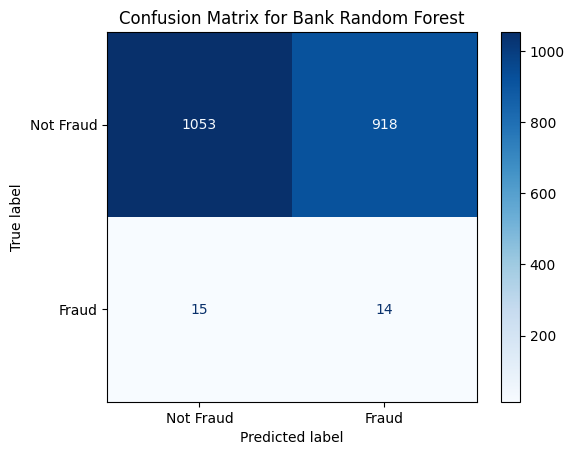

ROC AUC Score: 0.5359
Precision: 0.0150
Recall (Sensitivity): 0.4828
Specificity (True Negative Rate): 0.5342
False Positive Rate (FPR): 0.4658
False Negative Rate (FNR): 0.5172

--- Training XGBoost for Bank Transactions ---

Training xgboost model...


d:\EsH\KAIM\week89\fraud-detection-ml\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:32:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


xgboost training complete.

--- Evaluating Bank XGBoost ---
F1-Score: 0.0382
AUC-PR (Average Precision): 0.0234

Confusion Matrix:
[[973 998]
 [  9  20]]


<Figure size 600x500 with 0 Axes>

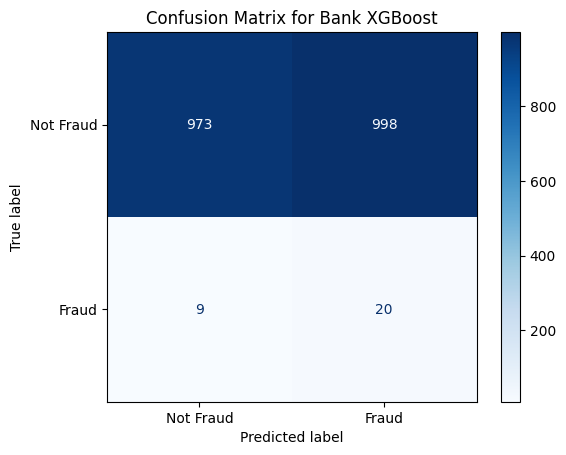

ROC AUC Score: 0.6097
Precision: 0.0196
Recall (Sensitivity): 0.6897
Specificity (True Negative Rate): 0.4937
False Positive Rate (FPR): 0.5063
False Negative Rate (FNR): 0.3103


In [5]:
# --- 3. Bank Transaction Fraud Model Experimentation ---
print("\n==== Bank Transaction Fraud Model Experimentation ====")

# Experiment 3.1: Random Forest
print("\n--- Training Random Forest for Bank Transactions ---")
rf_creditcard_model = trainer.train_ensemble_model(X_creditcard_train_resampled, y_creditcard_train_resampled, model_type='random_forest')
metrics_rf_creditcard = evaluator.evaluate_model(rf_creditcard_model, X_creditcard_test_scaled, y_creditcard_test, "Bank Random Forest")
all_evaluation_results['Bank_RandomForest'] = metrics_rf_creditcard

# Experiment 3.2: XGBoost (basic example)
print("\n--- Training XGBoost for Bank Transactions ---")
xgb_creditcard_model = trainer.train_ensemble_model(X_creditcard_train_resampled, y_creditcard_train_resampled, model_type='xgboost')
metrics_xgb_creditcard = evaluator.evaluate_model(xgb_creditcard_model, X_creditcard_test_scaled, y_creditcard_test, "Bank XGBoost")
all_evaluation_results['Bank_XGBoost'] = metrics_xgb_creditcard

In [6]:
# --- 4. Model Comparison and Selection ---
print("\n==== Model Comparison and Selection ====")
evaluator.compare_models(all_evaluation_results)


==== Model Comparison and Selection ====

--- Model Comparison ---
                           f1_score    auc_pr   roc_auc precision    recall  \
E-commerce_LR              0.170347  0.091636  0.421004  0.102273  0.509434   
E-commerce_LightGBM_Tuned  0.156069  0.098471  0.436453   0.09215  0.509434   
Bank_RandomForest          0.029136  0.016503    0.5359  0.015021  0.482759   
Bank_XGBoost               0.038204  0.023406   0.60972  0.019646  0.689655   

                          specificity       fpr       fnr  
E-commerce_LR                0.469799  0.530201  0.490566  
E-commerce_LightGBM_Tuned    0.404922  0.595078  0.490566  
Bank_RandomForest            0.534247  0.465753  0.517241  
Bank_XGBoost                 0.493658  0.506342  0.310345  

--- Justification for Best Model Selection ---
Based on AUC-PR, the 'E-commerce_LightGBM_Tuned' model performed best with an AUC-PR of 0.0985.
AUC-PR is particularly suitable for imbalanced fraud detection problems because it focuses
o


==== Model Explainability for Best E-commerce Model ====

Generating SHAP explanations for the model (Type: tree_based)...
SHAP values generated successfully.

Generating SHAP Summary Plot (bar type) E-commerce Fraud (Best Model)...


d:\EsH\KAIM\week89\fraud-detection-ml\env\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


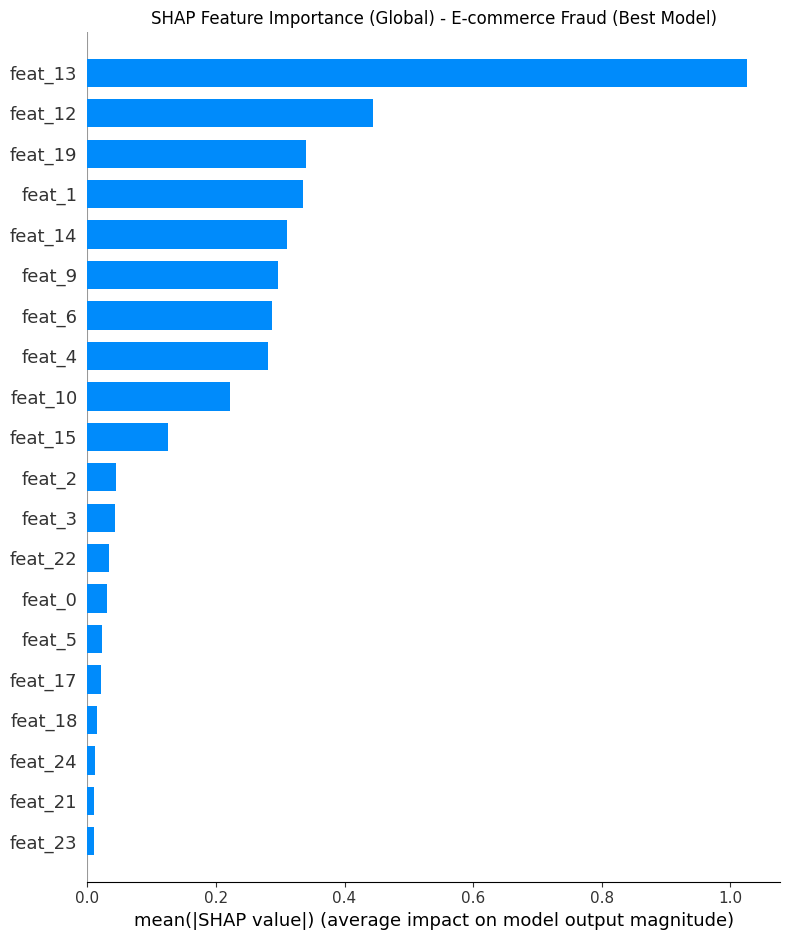

SHAP Summary Plot 'bar' displayed.

Generating SHAP Summary Plot (dot type) E-commerce Fraud (Best Model)...


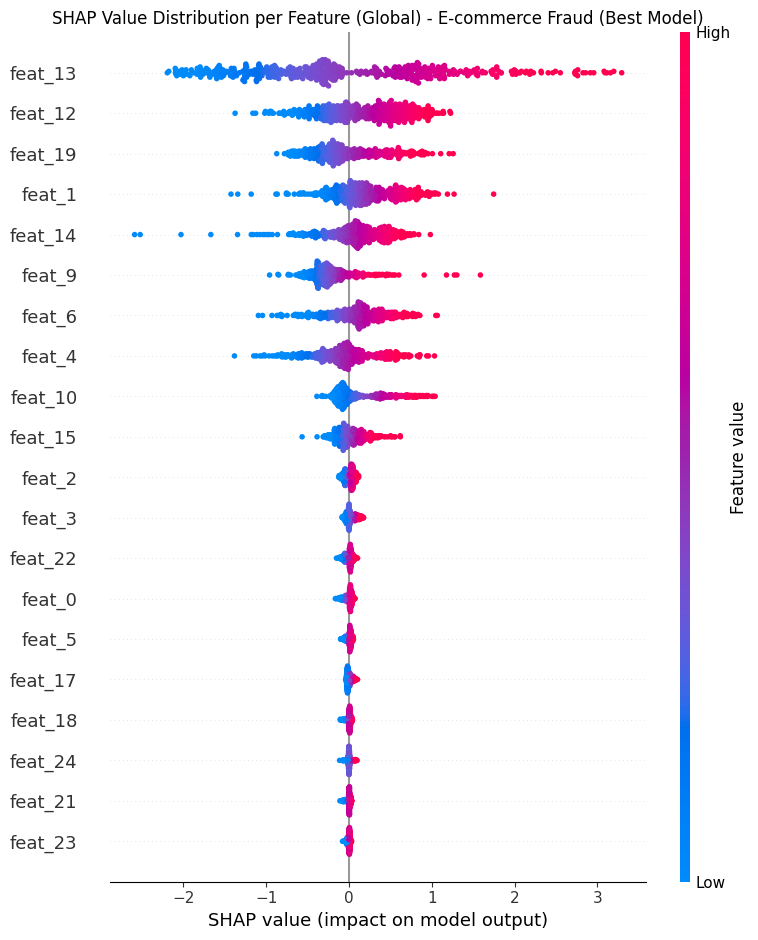

SHAP Summary Plot 'dot' displayed.

Generating SHAP Force Plot for a single instance E-commerce Fraud Instance (ID: 7)...


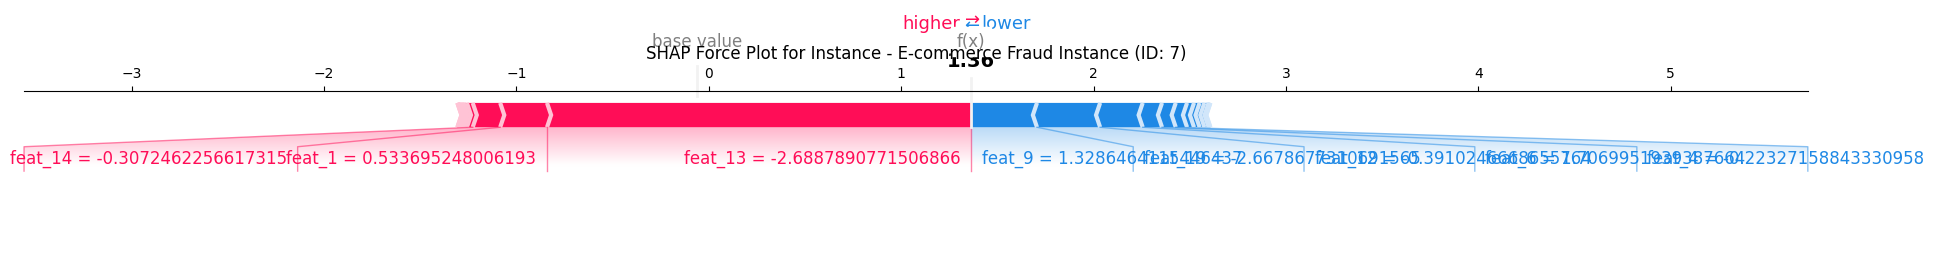

SHAP Force Plot displayed for instance: E-commerce Fraud Instance (ID: 7).

--- Interpreting SHAP Plots for Best E-commerce Fraud Model on E-commerce Data ---

Global Feature Importance (Summary Plot - Dot/Bar):
  - **Dot Plot (Beeswarm)**: Each point is an instance. Position on X-axis is SHAP value (impact on model output).
    Color indicates feature value (e.g., red=high, blue=low). Vertical scatter shows distribution.
    Features are ordered by average absolute SHAP value (most impactful at top).
  - **Bar Plot**: Shows the average absolute SHAP value for each feature, providing a rank of overall feature importance.
  - **Insights for Fraud**: Identify features that consistently push predictions towards 'Fraud' (positive SHAP values).
    For example, high 'purchase_value' or transactions from 'high-risk countries' might be strong indicators.
    Conversely, features pushing towards 'Not Fraud' (negative SHAP values) are important for legitimate transactions.

Local Feature Import

In [7]:
# --- 5. Model Explainability (Example with best E-commerce Model) ---
print("\n==== Model Explainability for Best E-commerce Model ====")
# Assuming best_lgbm_fraud_model was chosen based on comparison
if best_lgbm_fraud_model is not None:
    shap_values_fraud, explainer_fraud = explainer.explain_model(best_lgbm_fraud_model, X_fraud_test_scaled, model_type='tree_based')

    # Global Summary Plots
    explainer.plot_shap_summary(shap_values_fraud, X_fraud_test_scaled.columns.tolist(), plot_type='bar', plot_title='E-commerce Fraud (Best Model)')
    explainer.plot_shap_summary(shap_values_fraud, X_fraud_test_scaled.columns.tolist(), plot_type='dot', plot_title='E-commerce Fraud (Best Model)')

    # Local Force Plot for a specific (e.g., fraudulent) instance
    fraud_indices = y_fraud_test[y_fraud_test == 1].index.tolist()
    if fraud_indices:
        sample_fraud_idx = fraud_indices[0] # Pick the first fraudulent transaction
        explainer.plot_shap_force_plot(explainer_fraud, shap_values_fraud[sample_fraud_idx], X_fraud_test_scaled.iloc[sample_fraud_idx], f'E-commerce Fraud Instance (ID: {sample_fraud_idx})')

    explainer.interpret_shap_plots("Best E-commerce Fraud Model", "E-commerce")

In [8]:
# --- 6. Save Best Models ---
# After reviewing evaluations, save the chosen models to 'models/' directory
print("\n--- Saving Selected Best Models ---")
# Example: Save the best LightGBM for e-commerce and Random Forest for credit card
trainer.save_model(best_lgbm_fraud_model, 'fraud_lightgbm_final', X_fraud_train_resampled.columns.tolist())
trainer.save_model(rf_creditcard_model, 'creditcard_random_forest_final', X_creditcard_train_resampled.columns.tolist())

print("\nModel experimentation and evaluation complete. Final models saved.")


--- Saving Selected Best Models ---
Model 'fraud_lightgbm_final' saved to 'models/fraud_lightgbm_final.pkl'
Feature names for 'fraud_lightgbm_final' saved to 'models/fraud_lightgbm_final_features.pkl'
Model 'creditcard_random_forest_final' saved to 'models/creditcard_random_forest_final.pkl'
Feature names for 'creditcard_random_forest_final' saved to 'models/creditcard_random_forest_final_features.pkl'

Model experimentation and evaluation complete. Final models saved.
